# Extracción de características locales

Fuentes

Feature Detection and Description - https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html

Feature Detection, Description and Matching of Images using OpenCV - https://www.analyticsvidhya.com/blog/2021/06/feature-detection-description-and-matching-of-images-using-opencv/

Un humano es capaz de reconocer los elementos que hay en las imágenes. De forma sencilla, la visión por ordenador es lo que permite a los ordenadores ver y procesar datos visuales igual que los humanos. La visión por ordenador consiste en analizar las imágenes para producir información útil.

¿Qué es una característica?

Cuando ves una imagen de un mango, ¿cómo puedes identificarlo como tal?

Analizando el color, la forma y la textura puedes decir que es un mango.

Las pistas que se utilizan para identificar o reconocer una imagen se llaman características de una imagen. De la misma manera, las funciones del ordenador lo hacen para detectar varias características en una imagen.

Primero vamos a importar las librerias necesarias

In [2]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt 

Para este caso redimensionamos la imagen, ya que es algo grande

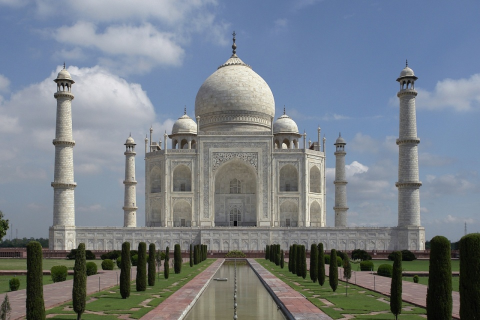

In [6]:
img_name = 'taj-mahal.jpg'

def leer_image(imagen):
  image = cv2.imread(img_name)

  width, height = 0.5, 0.5
  image = cv2.resize(image, (0, 0), image, width, height)

  return image

image = leer_image(img_name)
cv2_imshow(image)

# Detector de esquinas de Harris

El algoritmo de detección de esquinas de Harris se utiliza para detectar las esquinas en una imagen de entrada. Este algoritmo tiene tres pasos principales.

* Determina qué parte de la imagen tiene una gran variación de intensidad, ya que las esquinas tienen grandes variaciones de intensidad. Para ello, mueve una ventana deslizante por toda la imagen.
* Para cada ventana identificada, calcula un valor de puntuación R.
* Aplica el umbral a la puntuación y marca las esquinas.

OpenCV tiene la función cv.cornerHarris() para este propósito. Sus argumentos son

* img - Imagen de entrada. Debe ser en escala de grises y de tipo float32.
* blockSize - Es el tamaño del vecindario considerado para la detección de esquinas
* ksize - Parámetro de apertura de la derivada de Sobel utilizada.
* k - Parámetro libre del detector Harris en la ecuación.

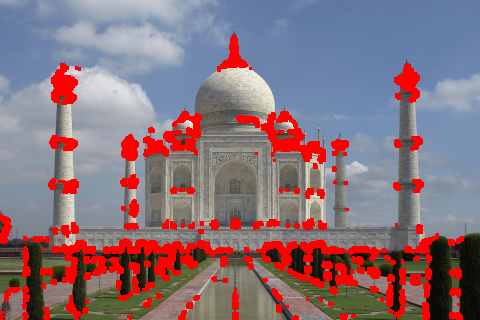

In [15]:
image = leer_image(img_name)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

dst = cv2.cornerHarris(gray, 2, 3, 0.004)
dst = cv2.dilate(dst,None)

image[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2_imshow(image)

# Detector de esquinas Shi-Tomasi

Este es otro algoritmo de detección de esquinas. Funciona de forma similar a la detección de esquinas de Harris. La única diferencia aquí es el cálculo del valor de R. Este algoritmo también nos permite encontrar las mejores n esquinas en una imagen.

OpenCV tiene la función, cv.goodFeaturesToTrack(). Encuentra N esquinas más fuertes en la imagen por el método Shi-Tomasi (o Harris Corner Detection, si lo especifica). Los parametros son los siguientes: 
* La imagen debe ser una imagen en escala de grises. 
* Especifica el número de esquinas que desea encontrar.
* Especifica el nivel de calidad, que es un valor entre 0-1, que denota la calidad mínima de la esquina por debajo de la cual todos son rechazados. 
* Se proporciona la distancia euclidiana mínima entre las esquinas detectadas.

Con toda esta información, la función encuentra las esquinas en la imagen. Todas las esquinas por debajo del nivel de calidad son rechazadas. A continuación, clasifica las esquinas restantes en función de la calidad en orden descendente. A continuación, la función toma la primera esquina más fuerte, desecha todas las esquinas cercanas en el rango de la distancia mínima y devuelve N esquinas más fuertes.



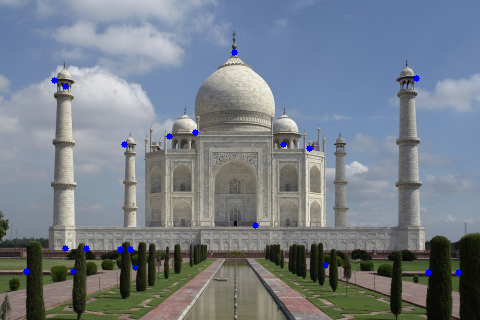

In [8]:
image = leer_image(img_name)
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray1, 20, 0.01, 10)
corners = np.int0(corners) 

for i in corners:
    x,y = i.ravel()
    cv2.circle(image, (x,y), 3, 255, -1) 

cv2_imshow(image)

# Scale-Invariant Feature Transform (SIFT)

SIFT se utiliza para detectar esquinas, blobs, círculos, etc. También se utiliza para escalar una imagen.


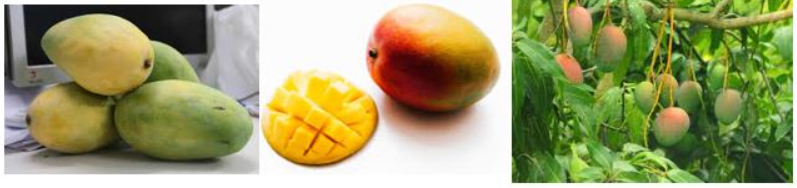

Considera estas tres imágenes. Aunque difieren en el color, la rotación y el ángulo, usted sabe que se trata de tres imágenes diferentes de mangos. ¿Cómo puede un ordenador identificar esto?

Tanto el algoritmo de detección de esquinas de Harris como el de Shi-Tomasi fallan en este caso. Pero el algoritmo SIFT desempeña un papel fundamental en este caso. Puede detectar características de la imagen independientemente de su tamaño y orientación.

Fuente: https://stackoverflow.com/questions/64474059/how-to-use-sift-and-surf-algorithm-in-google-colab-with-opencv4

En OpenCV pueden darse un problema de uso con la libreria OpenCV. Esto se da por un problema de patentes de los algoritmos. Para solucionar esto, primero se debe verificar la version de OpenCV

In [3]:
print(cv2.__version__)

4.4.0


Luego dependiendo de la version de la libreria, se usa un modulo u otro

version = 4.4.0 then sift = cv2.SIFT_create()

version = 4.3.x then sift = cv2.xfeatures2d.SIFT_create()

Para versiones anteriores es probable que ninguna de las dos opciones anteriores sean utilies. Lo mejor seria actualilzar instalando la version del repositorio open-contrib

In [20]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7 MB 1.2 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


La función sift.detect() encuentra los keypoints en las imágenes. Se le puede pasar una máscara si la busqueda es en sólo una parte de la imagen. Cada punto clave es una estructura especial que tiene muchos atributos como sus coordenadas (x,y), el tamaño de la vecindad significativa, el ángulo que especifica su orientación, la respuesta que especifica la fuerza de los puntos clave, etc.

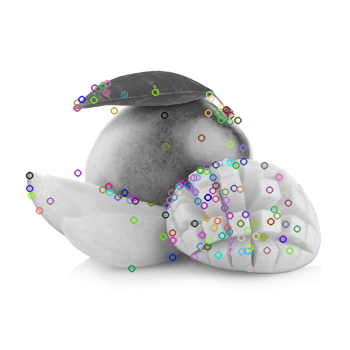

In [26]:
img_name="mango-1.jpg"
image = leer_image(img_name)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img = cv2.drawKeypoints(gray, kp, image)

cv2_imshow(img)

OpenCV también proporciona la función cv.drawKeyPoints() que dibuja pequeños círculos en las ubicaciones de los puntos clave. Con la bandera cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, dibujará un círculo con el tamaño del punto clave e incluso mostrará su orientación.

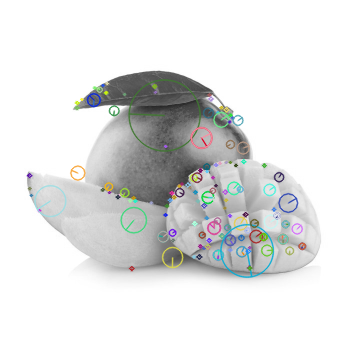

In [27]:
img = cv2.drawKeypoints(gray, kp, img, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img)

Ahora para calcular el descriptor, OpenCV proporciona dos métodos.

* Como ya se ha encontrado los puntos clave, se puede llamar a sift.compute() que calcula los descriptores a partir de los puntos clave que hemos encontrado. Ej: kp,des = sift.compute(gray,kp)
* Si no ha encontrado puntos clave, se puede hacer encontrarlos junto con los descriptores en un solo paso con la función sift.detectAndCompute(). Aquí kp será una lista de puntos clave y des es una matriz numpy de forma (keypoints) X 128

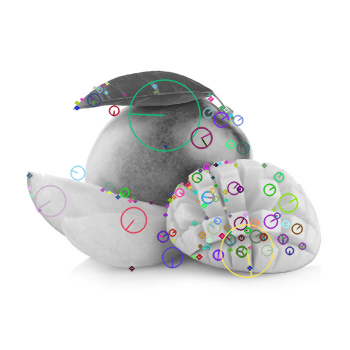

In [28]:
image = leer_image(img_name)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
kp, des = sift.compute(gray,kp)

img = cv2.drawKeypoints(gray, kp, image, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img)

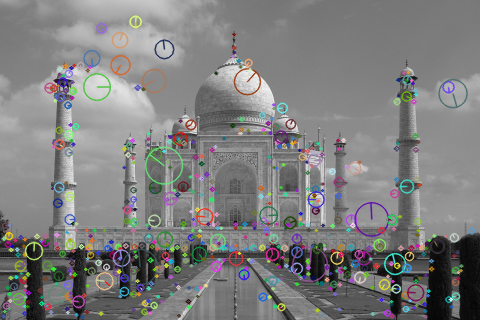

In [12]:
image = leer_image(img_name)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)

# print(type(kp))
# print(kp[0:10])

img = cv2.drawKeypoints(gray, kp, image, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(img)

# SURF

Fuentes

Mahotas – Speeded-Up Robust Features - https://www.geeksforgeeks.org/mahotas-speeded-up-robust-features/

Speeded-Up Robust Features - https://mahotas.readthedocs.io/en/latest/surf.html

milk 0.6.1 - https://pypi.org/project/milk/

En pocas palabras, el algoritmo SURF es una versión mejorada de SIFT. 

En opencv, podemos utilizar SURF.detect(), SURF.compute() etc para encontrar puntos clave y descriptores. Sin embargo este tiene el mismo problema de SIFT respecto a los derechos de autor de los algoritmos.

En este caso, vamos a utilizar otra libreria de procesamiento de imagenes que ya habiamos usado en la clase anterior (mahotas). Junto con esta, la libreria milk (MACHINE LEARNING TOOLKIT), que integra varios algoritmos de clasificacion de forma muy sencilla de utilizar.

In [13]:
!pip install numpy --upgrade
!pip install mahotas
!pip install milk

     |████████████████████████████████| 5.7 MB 4.3 MB/s 
     |████████████████████████████████| 628 kB 5.9 MB/s 
  Created wheel for milk: filename=milk-0.6.1-cp37-cp37m-linux_x86_64.whl size=671146 sha256=65854ffcf56c415cdfc23df8456d7cedbde7ca767c7079a5f059bf474447848b
  Stored in directory: /root/.cache/pip/wheels/95/70/08/757e59ac065fd09350505530dab08ef3a7b62479cc86a5b5ee
Successfully built milk


* Paso 1: Primero empezamos importando la imagen. Podemos preprocesar la imagen 
mediante un filtro gaussiano antes de detectar los puntos. Ya con esto usamos surf.surf() para detectarlos. Este combina deteccion y desripcion de los puntos de interes. Tomar en cuenta que la funcion no devuelve directamente los puntos de interes como lo haciamos en opencv.
* Paso 2: Ya obtenidos los puntos, realizamos un proceso sencillo de clustering. La matriz de colores solo indica la paleta de colores a usar para diferenciar los puntos en la grafica.
* Pase 3: surf.show_surf() dibuja poligonos, de los colores indicados, dentro de la imagen

Nr points: 83


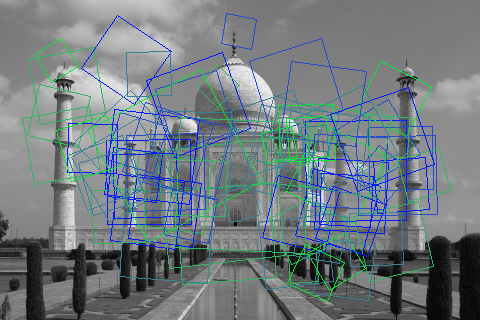

In [14]:
from mahotas.features import surf
import mahotas
import milk

# Paso 1
image = leer_image(img_name)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gaussian = mahotas.gaussian_filter(gray, 5)
kp = surf.surf(gaussian)
print("Nr points: {}".format(len(kp)))

# Paso 2
try:
    descrs = kp[:,5:]
    k = 5
    values, _ = milk.kmeans(descrs, k)
    colors = np.array([(255-52 * i, 25+52 * i, 37 ** i % 101) for i in range(k)])
except:
    values = np.zeros(100)
    colors = np.array([(255,0,0)])

# Paso 3
img_pts = surf.show_surf(gray, kp[:100], values, colors)

cv2_imshow(img_pts)

# LBP

Fuentes

Mahotas – Computing Linear Binary Patterns - https://www.geeksforgeeks.org/mahotas-computing-linear-binary-patterns/

Local Binary Patterns - https://mahotas.readthedocs.io/en/latest/lbp.html

Python Local Binary Patterns in Mahotas - https://cppsecrets.com/users/139651099710810510746981041171091051079755484964103109971051084699111109/Python-Local-Binary-Patterns-in-Mahotas.php

https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/

Los patrones binarios locales es un tipo de descriptor visual que se utiliza para la clasificación en visión artificial. 

Para hacer esto usaremos el método mahotas.features.lbp

* Sintaxis: mahotas.features.lbp(imagen, radio, puntos)
* Argumento: toma el objeto imagen y dos enteros como argumento
* Retorno: devuelve 1-D numpy ndarray, es decir, un histograma

Labelled Image


(array([5., 0., 1., 0., 1., 0., 0., 0., 0., 1.]),
 array([    0. ,  8461.2, 16922.4, 25383.6, 33844.8, 42306. , 50767.2,
        59228.4, 67689.6, 76150.8, 84612. ]),
 <a list of 10 Patch objects>)

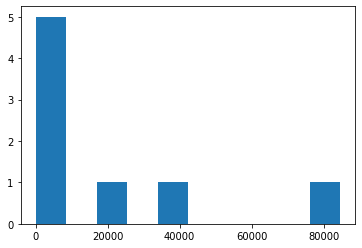

In [18]:
import mahotas
import mahotas as mh
import matplotlib.pyplot as plt
 
image = leer_image(img_name)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
     
# setting gaussian filter
gaussian = mahotas.gaussian_filter(gray, 5)
  
# setting threshold value
gaussian = (gaussian > gaussian.mean())
  
# making is labelled image
labeled, n = mahotas.label(gaussian)
 
# showing image
print("Labelled Image")
# cv2_imshow(labeled)
 #cv2_imshow(labeled)

# Computing Linear Binary Patterns
value = mahotas.features.lbp(labeled, 200, 5, ignore_zeros = False)

# showing histograph
plt.hist(value)

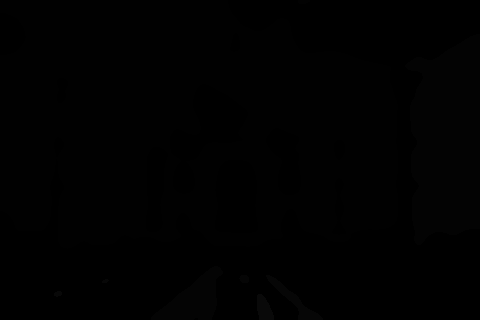

In [19]:
cv2_imshow(labeled)

Labeled Image


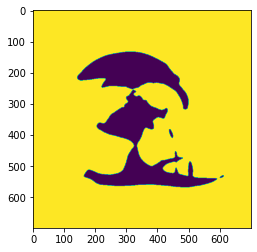

(array([7., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  1359. ,  43456.7,  85554.4, 127652.1, 169749.8, 211847.5,
        253945.2, 296042.9, 338140.6, 380238.3, 422336. ]),
 <a list of 10 Patch objects>)

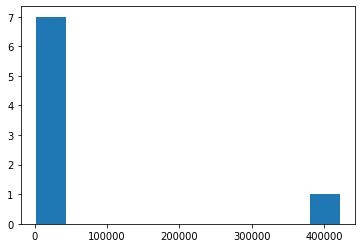

In [25]:
# importing required libraries
import numpy as np
import mahotas
from pylab import imshow, show
import matplotlib.pyplot as plt

# loading image
img = mahotas.imread('mango-1.jpg')

# filtering image
img = img[:, :, 0]

# gaussian filter
gaussian = mahotas.gaussian_filter(img, 5)

# setting threshold value
gaussian = (gaussian > gaussian.mean())

# labelling image
label, n = mahotas.label(gaussian)

# showing image
print("Labeled Image")
imshow(label)
show()

# Computing Linear Binary Patterns
value = mahotas.features.lbp(label, 200, 5, ignore_zeros=False)

# displaying histogram
plt.hist(value)